In [2]:
from keras.datasets import fashion_mnist

In [51]:
data = fashion_mnist.load_data()

In [52]:
data[0][0].shape

(60000, 28, 28)

In [53]:
data[0][1].shape

(60000,)

In [54]:
trainX = data[0][0]
trainY = data[0][1]

In [55]:
trainX.shape

(60000, 28, 28)

#### Target number mapping

<img src="https://github.com/awantik/machine-learning-slides/blob/master/fashion-mnist.PNG?raw=true" width="200px">

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
trainY[3]

3

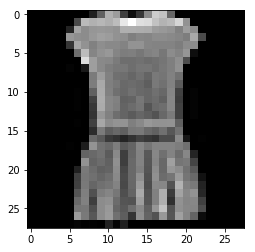

In [58]:
plt.imshow(trainX[3],cmap='gray')

In [27]:
X = trainX.reshape(60000,-1)

In [28]:
X.shape

(60000, 784)

In [29]:
Y = trainY

In [30]:
Y.shape

(60000,)

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [32]:
trainX,testX, trainY, testY = train_test_split(X,Y)

In [34]:
from sklearn.decomposition import PCA

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [39]:
pipeline = make_pipeline(
                          PCA(n_components=32, whiten=True),
                          SVC(C=1, gamma=100,kernel='rbf')
                        )

In [42]:
gs = GridSearchCV(pipeline,cv=5,param_grid={'svc__kernel':['poly','rbf'], 'svc__gamma':[10,100,1000]}, n_jobs=-1)

In [43]:
gs.fit(trainX, trainY)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=32, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'svc__kernel': ['poly', 'rbf'], 'svc__gamma': [10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
gs.best_params_

{'svc__gamma': 100, 'svc__kernel': 'poly'}

In [45]:
gs.best_score_

0.8477777777777777

In [47]:
model = gs.best_estimator_

In [89]:
pred = model.predict(testX)

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [91]:
accuracy_score(y_pred=pred, y_true=testY)

0.8494666666666667

In [93]:
import seaborn as sns; sns.set()

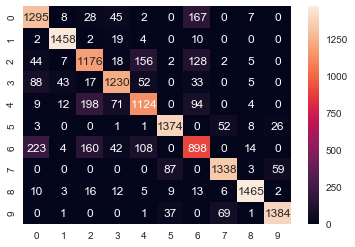

In [101]:
sns.heatmap(confusion_matrix(y_pred=pred, y_true=testY), annot=True, fmt='d')